In [1]:
import pandas as pd
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import ast
from IPython.display import Image


In [2]:
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)  

# import morocco_world_cup_events.csv
df = pd.read_csv('morocco_world_cup_events.csv')
df.head(5)

/var/folders/cr/687s4h5s3ndb0qw1gmsgrrlh0000gn/T/ipykernel_76181/3918877923.py:6: DtypeWarning: Columns (8,11,13,14,15,16,17,18,19,20,22,23,24,25,27,28,29,30,31,49,64,65,66,68,69,70,71,72,73,74,75,76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('morocco_world_cup_events.csv')


,duration,id,index,injury_stoppage_in_chain,interception_outcome,location,match_id,minute,miscontrol_aerial_won,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_deflected,pass_end_location,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_miscommunication,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_open_goal,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure,ball_recovery_offensive,block_save_block,foul_committed_type,goalkeeper_body_part,pass_cut_back,pass_no_touch,block_offensive,foul_committed_offensive,goalkeeper_punched_out,goalkeeper_shot_saved_off_target,shot_saved_off_target,goalkeeper_shot_saved_to_post,shot_saved_to_post,bad_behaviour_card
0,0.0,f07beff6-a7be-48fc-9ba9-4fa59a9ef16d,1,NaN,NaN,NaN,3857276,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Canada,1833,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 4411, 'lineup': [{'player': {'id...",Canada,1833,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,82182331-7ca3-4ab6-a2d1-b7eacb99caa1,2,NaN,NaN,NaN,3857276,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Canada,1833,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Morocco,788,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,cbc9ccaa-5255-4801-8e29-6b6ac0b67a64,3,NaN,NaN,NaN,3857276,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Canada,1833,['231e906a-cde7-4a6e-9c66-7af9a1bc5fd3'],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Morocco,788,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,231e906a-cde7-4a6e-9c66-7af9a1bc5fd3,4,NaN,NaN,NaN,3857276,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Canada,1833,['cbc9ccaa-5255-4801-8e29-6b6ac0b67a64'],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,1833,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,91f02b5b-8c38-4b81-8352-66e3b084f835,1714,NaN,NaN,NaN,3857276,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,From Throw In,NaN,NaN,NaN,85,Canada,1833,['183fa060-dcf9-4bff-acc9-3997c1cfb1e2'],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Morocco,788,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


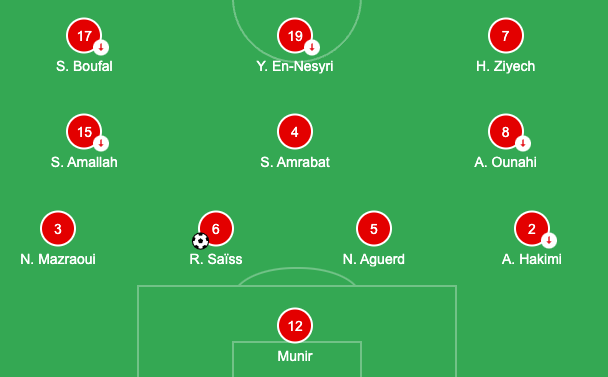

In [211]:
Image(filename='morocco_formation.png')


In [3]:
# Make a dataframe where team is Morocco
morocco_events = df[df['team'] == 'Morocco']


Morocco stuck to a 4-3-3 formation throughout the 7 matches of the World Cup period. In other words, there was a clear Plan A. The starting lineup also saw very little change. Especially, the forward line was always the same starting lineup.

/var/folders/cr/687s4h5s3ndb0qw1gmsgrrlh0000gn/T/ipykernel_76181/1520513203.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morocco_events['location'] = morocco_events['location'].apply(safe_literal_eval)
/var/folders/cr/687s4h5s3ndb0qw1gmsgrrlh0000gn/T/ipykernel_76181/1520513203.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morocco_events['x'] = morocco_events['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
/var/folders/cr/687s4h5s3ndb0qw1gmsgrrlh0000gn/T/ipykernel_7618

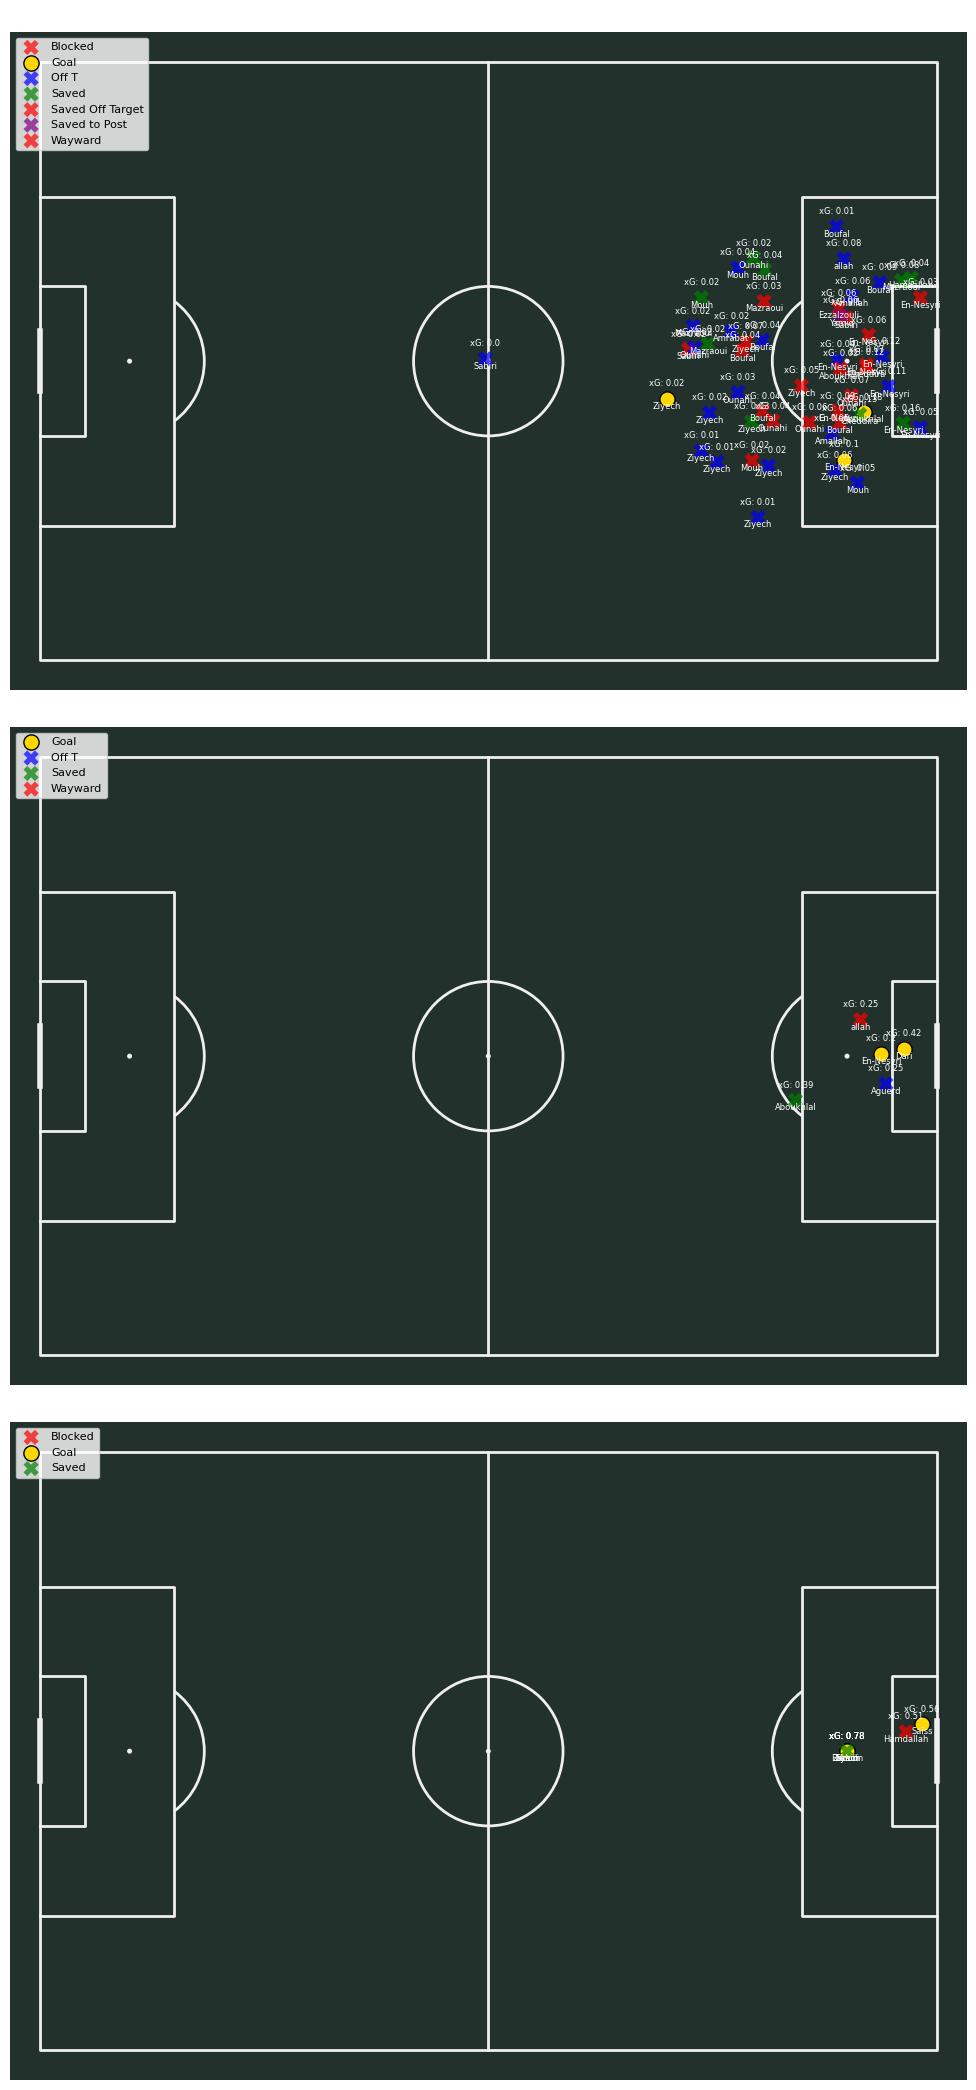

In [9]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import ast
import pandas as pd

# Assuming 'morocco_events' is your DataFrame prepared beforehand
# Define a color for each shot outcome
outcome_colors = {
    'Goal': 'gold',
    'Saved': 'green',
    'Missed': 'lightgreen',
    'Blocked': 'red',
    'Saved to Post': 'purple',
    'Off T': 'blue'
    # Add more mappings as needed based on the shot outcomes in your data
}

# Default color and marker for outcomes not in the mapping
default_color = 'red'
default_marker = 'X'

def safe_literal_eval(val):
    # Check if 'val' is already a list (or None) and return it directly if so
    if not isinstance(val, str):
        return val
    try:
        # Attempt to parse 'val' as a literal from a string
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        # Return 'val' as-is if parsing fails
        return val

# Apply 'safe_literal_eval' to the 'location' column
morocco_events['location'] = morocco_events['location'].apply(safe_literal_eval)

# Now, safely extract 'x', 'y' coordinates and proceed with the rest of your code
morocco_events['x'] = morocco_events['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
morocco_events['y'] = morocco_events['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
morocco_events['last_name'] = morocco_events['player'].apply(lambda name: name.split()[-1] if pd.notna(name) else '')
morocco_events['shot_statsbomb_xg'] = morocco_events['shot_statsbomb_xg'].astype(float).round(2)

shots = morocco_events[morocco_events['type'] == 'Shot'].dropna(subset=['location'])

# Splitting shots into three categories based on xG values
low_xg_shots = shots[(shots['shot_statsbomb_xg'] >= 0) & (shots['shot_statsbomb_xg'] < 0.2)]
medium_xg_shots = shots[(shots['shot_statsbomb_xg'] >= 0.2) & (shots['shot_statsbomb_xg'] < 0.5)]
high_xg_shots = shots[shots['shot_statsbomb_xg'] >= 0.5]

# Function to plot shots
def plot_shots(subset, title, ax, outcome_colors, default_color='red', default_marker='X'):
    # Dictionary to hold custom legend handles
    legend_handles = {}
    
    for outcome, outcome_df in subset.groupby('shot_outcome'):
        color = outcome_colors.get(outcome, default_color)
        marker_style = 'o' if outcome == 'Goal' else default_marker
        alpha = 1 if outcome == 'Goal' else 0.7
        edgecolors = 'black' if outcome == 'Goal' else 'none'
        
        scatter = pitch.scatter(outcome_df['x'], outcome_df['y'], ax=ax, marker=marker_style, s=120,
                                color=color, edgecolors=edgecolors, alpha=alpha, label=outcome)
        
        # Create a legend handle for each outcome
        legend_handles[outcome] = scatter
        
        # Annotating player's last name and xG value
        for x, y, name, xg in zip(outcome_df['x'], outcome_df['y'], outcome_df['last_name'], outcome_df['shot_statsbomb_xg']):
            ax.text(x, y + 1, name, fontsize=6, ha='center', va='center', color='white')
            ax.text(x, y - 2, f'xG: {xg}', fontsize=6, ha='center', va='center', color='white')
    
    ax.set_title(title, color='white')
    
    # Using values of legend_handles to ensure unique legend entries
    ax.legend(handles=list(legend_handles.values()), loc='upper left', fontsize=8)

# Creating and plotting each category of shots on separate subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 21))
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#efefef')

pitch.draw(ax=axs[0])
plot_shots(low_xg_shots, 'Shots with 0 ~ 0.2 xG', axs[0], outcome_colors)

pitch.draw(ax=axs[1])
plot_shots(medium_xg_shots, 'Shots with 0.2 ~ 0.5 xG', axs[1], outcome_colors)

pitch.draw(ax=axs[2])
plot_shots(high_xg_shots, 'Shots more than 0.5 xG', axs[2], outcome_colors)

plt.tight_layout()
plt.show()


In [10]:
# want to see out of all the shots, who had the most shots with average xG value

# Grouping shots by player and calculating the average xG value
player_shots = shots.groupby('last_name').agg({'shot_statsbomb_xg': 'mean', 'type': 'count'}).rename(columns={'type': 'shots_count'})
player_shots = player_shots.sort_values('shots_count', ascending=False).head(10)

player_shots



,shot_statsbomb_xg,shots_count
last_name,,
Ziyech,0.098182,11
En-Nesyri,0.093636,11
Boufal,0.045714,7
Ounahi,0.040000,6
Mouh,0.182000,5
Sabiri,0.225000,4
Mazraoui,0.037500,4
Aboukhlal,0.196667,3
Hamdallah,0.275000,2


In [11]:
# Assuming there's a 'body_part' column in the 'shots' DataFrame and it contains a value like 'Head' for headers
headers = shots[shots['shot_body_part'] == 'Head']

# Counting headers by player
header_counts = headers['player'].value_counts().reset_index()
header_counts.columns = ['player', 'header_count']

# Displaying the player with the most header attempts
print(header_counts.head(3))


              player  header_count
0  Youssef En-Nesyri             7
1  Noussair Mazraoui             1
2       Nayef Aguerd             1


As expected, En-Nesyri had the most shots and headers as a target striker just like Christian Benteke and seems like Ziyech plays as a technician how he used to play in Ajax and Chelsea.

## Who Had the Most linkage with En-Nesyri?


In [13]:
# Assuming 'morocco_events' includes columns for event type, player names, and maybe target player names
# Filter for pass events
pass_events = morocco_events[morocco_events['type'] == 'Pass']

# Filter passes involving En-Nesyri either as the passer or the recipient
# This assumes you have 'player_name' for the passer and 'pass_recipient_name' for the recipient
enesyri_passes = pass_events[(pass_events['player'] == 'Youssef En-Nesyri') | 
                             (pass_events['pass_recipient'] == 'Youssef En-Nesyri')]

# Identify linkage - who passes to En-Nesyri and who receives passes from him
linkage_counts = pd.concat([
    enesyri_passes['player'].value_counts(), 
    enesyri_passes['pass_recipient'].value_counts()
]).groupby(level=0).sum().sort_values(ascending=False)

# Remove En-Nesyri from the linkage count to focus on other players
linkage_counts = linkage_counts.drop(index=['Youssef En-Nesyri'], errors='ignore')

# Display the top player who has the most linkage with En-Nesyri
print(linkage_counts.head(5))


Hakim Ziyech          32
Achraf Hakimi Mouh    30
Sofiane Boufal        21
Sofyan Amrabat        19
Azzedine Ounahi       17
Name: count, dtype: int64


- En-Nesyri's role as the focal point in attack is supported by creative and dynamic contributions from Ziyech and Hakimi, with midfielders like Amrabat and Ounahi facilitating ball movement and maintaining possession to build attacks.

- The varied sources of threats, from direct shots by midfielders to targeted crosses towards En-Nesyri, indicate a multifaceted attacking strategy that seeks to exploit both open play and set-pieces, maximizing the team's chances of scoring.

- Given the insights, it is advisable for D.C. United to focus on developing players who can fulfill roles akin to those of Hakim Ziyech and Achraf Hakimi. Their significant involvement in creating chances, taking shots, and their overall influence on the game, combined with positional flexibility and technical skills, exemplifies the type of creative engine and dynamic threat essential for a successful team strategy. Training players to emulate the characteristics and contributions of Ziyech and Hakimi could significantly enhance D.C. United's tactical versatility and offensive potency.

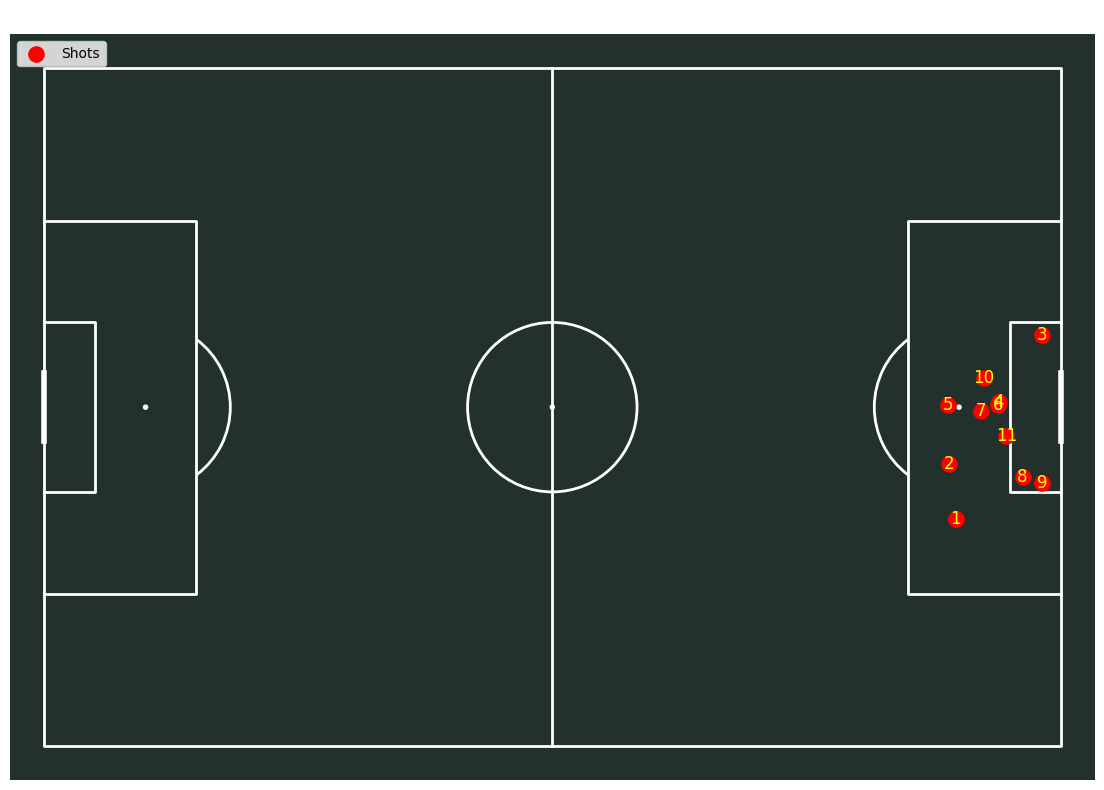

In [14]:
enesyri_shots = shots[shots['player'] == 'Youssef En-Nesyri']
enesyri_shots = enesyri_shots.sort_values(by=['match_id', 'timestamp'])
enesyri_shots['shot_sequence'] = range(1, len(enesyri_shots) + 1)

pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='white')
fig, ax = pitch.draw(figsize=(12, 8))
sc = pitch.scatter(enesyri_shots['x'], enesyri_shots['y'], s=120, ax=ax, label='Shots', color='red')

# Annotating each shot with its sequence number
for x, y, sequence in zip(enesyri_shots['x'], enesyri_shots['y'], enesyri_shots['shot_sequence']):
    plt.text(x, y, str(sequence), color="yellow", fontsize=12, ha='center', va='center')

plt.title('Sequence of Shots Made by Youssef En-Nesyri', fontsize=16, color='white')
plt.legend(loc='upper left')
plt.show()



In [67]:
def find_preceding_events(shot_event, all_events, some_threshold=30):
    """
    Identifies events leading up to a shot, excluding 'Pressure' type events.
    Resets sequence if an event from a non-Morocco team occurs.

    Parameters:
    - shot_event: The row from the DataFrame for the shot event.
    - all_events: DataFrame of all events in the match.
    - some_threshold: Time threshold in seconds to consider events as part of the same sequence.
    - team_name: The name of the team for which events are considered (default is 'Morocco').

    Returns:
    - DataFrame of events leading up to the shot, including the shot itself.
    
    """
    
    # Filter out 'Pressure' events from all_events before starting the loop
    all_events_filtered = all_events[(all_events['type'] != 'Pressure') & (all_events['match_id'] == shot_event['match_id'])]

    shot_timestamp = (shot_event['timestamp'])
    preceding_events = []

    # Initialize a temporary list to collect events until a non-team event is encountered
    temp_events = []

    # Iterate through events leading up to the shot, within the time threshold
    for _, current_event in all_events_filtered.iterrows():
        current_timestamp = (current_event['timestamp'])
        time_diff = (shot_timestamp - current_timestamp).total_seconds()
        
        # Only consider events within the time threshold leading up to the shot
        if 0 < time_diff < some_threshold:
            # If an event from the specified team is encountered, keep collecting
            #if current_event['team'] == 'Morocco':
            temp_events.append(current_event)
            #else:
                # If a non-team event is encountered, reset temp_events
                #temp_events.clear()

    # Convert temp_events to a DataFrame
    preceding_events_df = pd.DataFrame(temp_events)
    

    # Add the shot event to the sequence
    final_sequence = pd.concat([preceding_events_df, pd.DataFrame([shot_event])])

    # Return the sequence sorted by timestamp
    return final_sequence.sort_values(by='timestamp')




In [70]:
# Sorting by match_id first, then by timestamp within each match
events_sorted = df.sort_values(by=['match_id', 'timestamp'])

# Reset the index after sorting
events_sorted = events_sorted.reset_index(drop=True)

# Now, morocco_events_sorted is correctly sorted for sequence analysis
print(events_sorted.shape[0])

# save the sorted events to a csv file
events_sorted.to_csv('morocco_world_cup_events_sorted.csv', index=False)


25971


In [69]:
# Filter for shots by Youssef En-Nesyri
enesyri_shots = events_sorted[(events_sorted['type'] == 'Shot') & (events_sorted['player'] == 'Youssef En-Nesyri')]

# For demonstration, let's find preceding events for the first shot by En-Nesyri

first_shot = enesyri_shots.iloc[2]
sequence = find_preceding_events(first_shot, events_sorted, some_threshold=8)
print(sequence)

      duration                                    id  index  injury_stoppage_in_chain  interception_outcome       location  match_id  minute  miscontrol_aerial_won  off_camera  out  pass_aerial_won  pass_angle                 pass_assisted_shot_id pass_body_part  pass_cross  pass_deflected pass_end_location  pass_goal_assist  pass_height  pass_inswinging  pass_length  pass_miscommunication  pass_outcome  pass_outswinging     pass_recipient  pass_recipient_id pass_shot_assist  pass_switch  pass_technique  pass_through_ball pass_type  period   play_pattern             player  player_id                   position  possession possession_team  possession_team_id                                     related_events  second  shot_aerial_won shot_body_part shot_end_location  shot_first_time                                  shot_freeze_frame                      shot_key_pass_id  shot_one_on_one  shot_open_goal shot_outcome  shot_statsbomb_xg shot_technique  shot_type  substitution_outcome  \
527

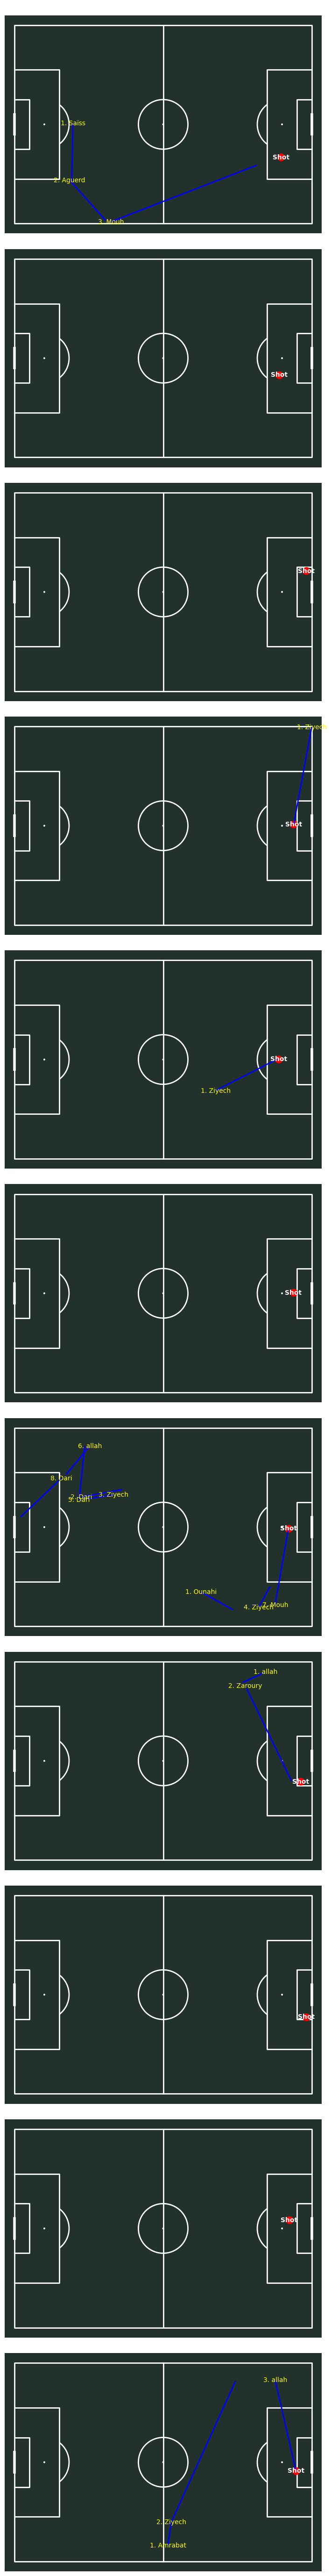

In [44]:
# Assuming enesyri_shots contains all shots by Youssef En-Nesyri
num_shots = len(enesyri_shots)

# Create a figure with multiple subplots arranged vertically (one per shot)
fig, axs = plt.subplots(num_shots, 1, figsize=(10, 5 * num_shots), constrained_layout=True)  # Increased the vertical size

# Ensure axs is an array even when there's only one shot
if num_shots == 1:
    axs = [axs]

# Iterate through each shot and plot the preceding sequence
for ax, (_, shot) in zip(axs, enesyri_shots.iterrows()):
    sequence = find_preceding_events(shot, events_sorted, some_threshold=15)
    pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='white')  # Adjusted figsize for each pitch
    pitch.draw(ax=ax)
    
    pass_counter = 1
    for i, event in sequence.iterrows():
        if pd.notna(event['location']):
            start_loc = ast.literal_eval(event['location'])
            
            # Annotate the event with the pass sequence number and player's last name only if it's a Pass
            if event['type'] == 'Pass':
                player_name = event['player'].split()[-1] if pd.notna(event['player']) else 'Unknown'
                annotation_text = f"{pass_counter}. {player_name}"
                pitch.annotate(annotation_text, xy=(start_loc[0], start_loc[1]), c='yellow', va='center', ha='center', size=10, ax=ax)  # Adjusted size for clarity
                
                pass_counter += 1  # Increment the pass counter only for pass events
                
                # If the event is a pass, draw the pass line
                if pd.notna(event['pass_end_location']):
                    end_loc = ast.literal_eval(event['pass_end_location'])
                    pitch.lines(start_loc[0], start_loc[1], end_loc[0], end_loc[1], lw=2, color='blue', ax=ax)

    # Highlighting the shot
    shot_loc = ast.literal_eval(shot['location'])
    pitch.scatter(shot_loc[0], shot_loc[1], s=120, color='red', label='Shot', ax=ax)
    pitch.annotate("Shot", xy=(shot_loc[0], shot_loc[1]), c='white', va='center', ha='center', size=10, weight='bold', ax=ax)  # Adjusted size for clarity

# Adding a title to each subplot for clarity
for i, ax in enumerate(axs):
    ax.set_title(f'Sequence leading up to En-Nesyri Shot #{i+1}', color='white', fontsize=14)  # Adjusted font size for clarity

plt.show()

In [208]:
# Get the unique values of match_id
match_ids = morocco_events_sorted['match_id'].unique()
match_ids

array([3857276, 3857277, 3857283, 3869220, 3869486, 3869552, 3869684])